In [1]:
import numpy as np
import pandas as pd
from random import shuffle

import graphviz
from networkx.drawing.nx_agraph import graphviz_layout

import itertools
import networkx as nx

from timeit import default_timer as timer
import matplotlib.pyplot as plt
from scipy.special import gammaln

import warnings
warnings.filterwarnings("ignore")

In [2]:
def initial_graph(df):
    G = nx.DiGraph()
    nodes = list(df.columns)
    shuffle(nodes)
    G.add_nodes_from(nodes)
    return G

In [3]:
def bs_score(node,parents,data):
    score = 0.0
    if not parents:
        mijk = np.array([data[node].value_counts()])
    else:
        mijk = np.array(pd.pivot_table(data[[node]+parents],index=parents,columns=node,aggfunc=len).fillna(0))

    for i,m in enumerate(mijk):
        alpha = len(np.unique(data[node]))
        score += ((gammaln(alpha)-gammaln(alpha+m.sum())).sum()+sum([gammaln(1+m[j]) for j in range(alpha)])).sum()
    return (score)

In [4]:
# Make sure the graph is DAG.
def succ_remove(G,node,nodes):
    possible_parents = nodes[:]
    for i in list(G.succ[node]):
        possible_parents.remove(i)
    possible_parents.remove(node)
    return possible_parents

In [5]:
def K2_search(data):
    G = initial_graph(data)
    nodes = list(G.nodes)

    sum_score = 0.0
    for i, node in enumerate(nodes):
        # generate all possible parents to search
        possible_parents = succ_remove(G,node,nodes)
        # Calculate current bs score
        current_parents = []
        current_score = bs_score(node, current_parents, data)
        while possible_parents:
            scores = []
            for j,parent in enumerate(possible_parents):
                new_score = bs_score(node, current_parents + [parent], data)
                scores.append(new_score)
            # pick the best local score
            best_score = np.max(scores)
            if best_score>current_score:
                new_parent = possible_parents.pop(np.argmax(scores))
                # add edges to temperal graph
                Gtemp = G.copy()
                Gtemp.add_edge(new_parent, node)
                # check if the diagram is DAG
                if nx.is_directed_acyclic_graph(Gtemp):
                    G.add_edge(new_parent, node)
                    current_parents.append(new_parent)
                    current_score = best_score
                    # Parents threshold
                    if len(current_parents) >= 5:#int(0.8*len(nodes)):
                        break
                else:
                    Gtemp = G
                    break
            else:
                break
        sum_score += current_score
    return G,sum_score

In [6]:
def structure_learn(data):
    start = timer()
    G, sum_score = K2_search(data)
    end = timer()
    time_used = end - start
    return G, sum_score, time_used

In [9]:
def graph_generator(G,score,timeused,dataname):
    px,py=10,50
    fig = plt.figure(figsize=(10,8))
    nx.draw(G, pos=graphviz_layout(G),with_labels=True, node_size=1000,font_size=10)
    plt.title('{}'.format(dataname), fontsize=20)
    plt.text(px, py, 'Time used: {0:.2f}s'.format(timeused),fontsize=15)
    plt.text(px, py-20, 'BS score: {0:.1f}'.format(score), fontsize=15)
    fig.savefig('{}.png'.format(dataname), bbox_inches='tight')
    plt.show()

In [7]:
titanic = pd.read_csv('titanic.csv', sep=',')
whitewine = pd.read_csv('whitewine.csv', sep=',')
schoolgrades = pd.read_csv('schoolgrades.csv', sep=',')
test = pd.read_csv('structurelearning_test.csv',sep=',')

In [8]:
G_s, sum_score_s, time_used_s = structure_learn(titanic)
G_m, sum_score_m, time_used_m = structure_learn(whitewine)
G_l, sum_score_l, time_used_l = structure_learn(schoolgrades)
G_t, sum_score_t, time_used_t = structure_learn(test)

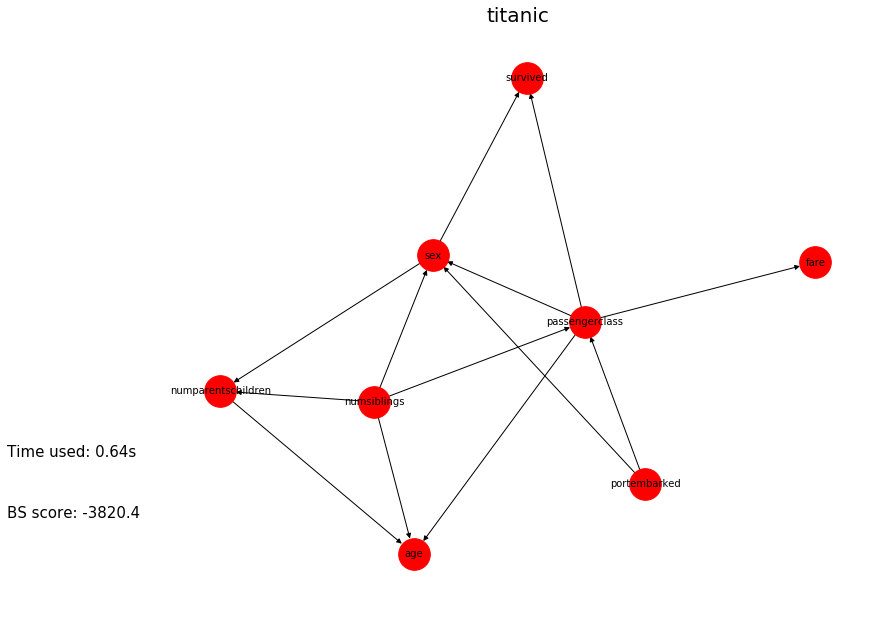

In [10]:
graph_generator(G_s, sum_score_s, time_used_s,'titanic')

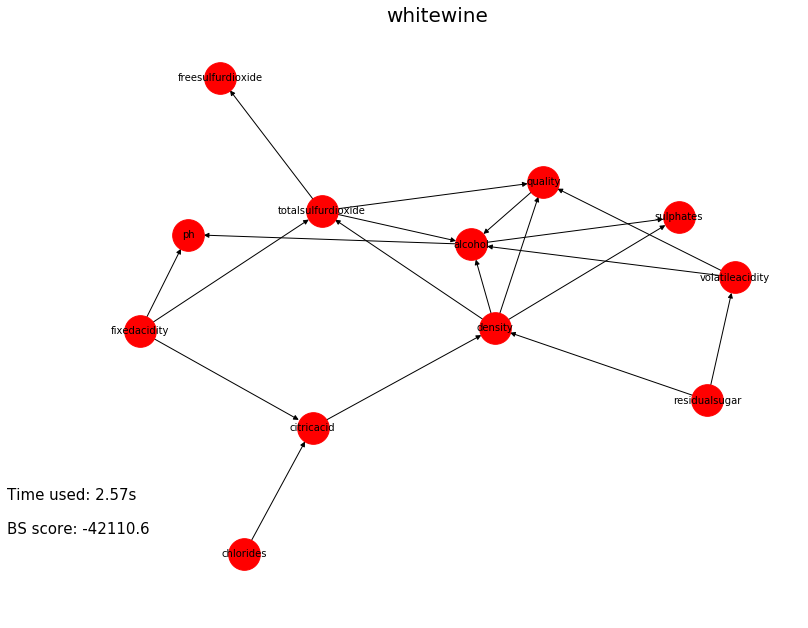

In [11]:
graph_generator(G_m, sum_score_m, time_used_m,'whitewine')

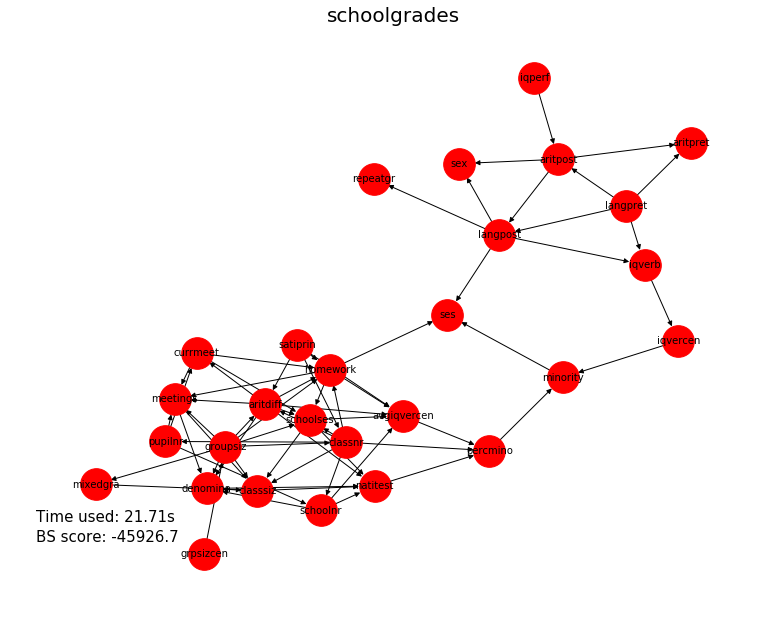

In [12]:
graph_generator(G_l, sum_score_l, time_used_l,'schoolgrades')

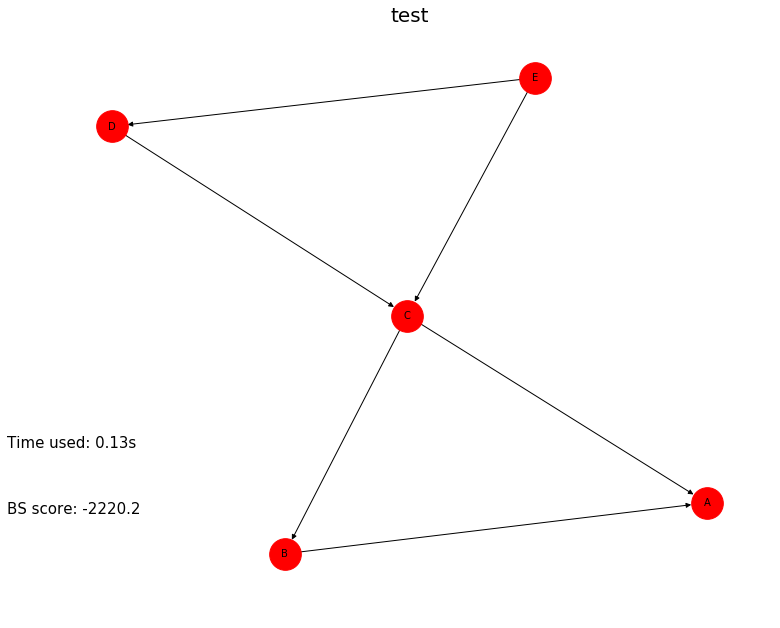

In [13]:
graph_generator(G_t, sum_score_t, time_used_t,'test')

In [ ]:
3600/((18+24)/44)

In [ ]:
3600/((18+24)/73.3)

In [ ]:
3600/((18+24)/117.3)

In [ ]:
k = 5280/(18+24)
k

In [ ]:
l = 18


In [ ]:
q = [30,50,80]

In [ ]:
q = [i for i in range(10, 100, 10)]

In [ ]:
# pipe's model
for i in q:
    l = 18
    s = (i*18)/10
    vol = 3600/((s+l)/(i*1.47))
    k = vol/i
    print(i, s, s+l,vol,k) 

In [ ]:
# Forbes's model
# time gap >= PRT (1.5s)
speed = q
vol = []
density = []
for i in q:
    prt = 1.5
    l = 18
    s = 1.5*1.47*i
    vol = 3600/((s + l)/(1.47*i))
    k = vol/i

    print (i, s, s+l,vol,k)

In [ ]:
3600/((54+18)/44)

In [ ]:
3600/((90+18)/73)

In [ ]:
3600/((144+18)/117)